# Challenge of the Week
---
© 2023, Zaka AI, Inc. All Rights Reserved.
## Case Study: Insurance Medical Cost Prediction

**Objective:**

In this exercise, you will explore a dataset of insurance data detailed below. You will build a model from scratch using Gradient Descent to predict the cost of treatment for individuals based on their age, sex, bmi and other information.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from this library the functions train_test_split and LinearRegression

In [35]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Read & visualize data
You should have the dataset on a csv file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.
Then display the head of your dataset

In [36]:
#Test Your Zaka
df= pd.read_csv(r'C:\Users\user\Courses & certifiations\AcademyZaka\Week 2\challenge\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [37]:
#Test Your Zaka
r,c = df.shape
print('there are',r,"rows and",c,"columns in this dataframe")

there are 1338 rows and 7 columns in this dataframe


Use the function **info()**, to check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [38]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Use the function **describe()** to can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [39]:
#Test Your Zaka
df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of charges

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.
To do this plot the histogram for the charges

Text(0.5, 1.0, 'distribution of charges for all ')

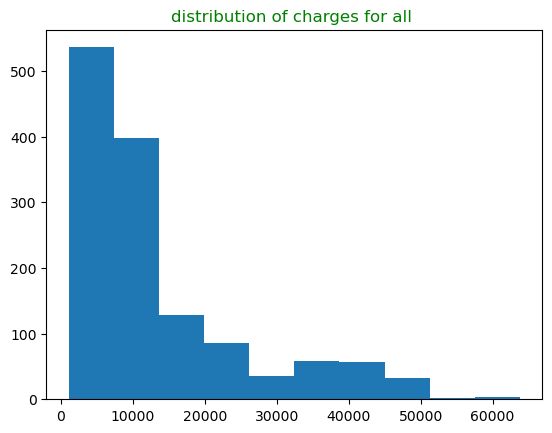

In [40]:
#Test Your Zaka
plt.hist(df.charges)
plt.title('distribution of charges for all ', color = 'g')

#### Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

First, separate the dataset between 2: smokers and non_smokers, and then see how many smokers vs non-smokers we have.

In [41]:
#Test Your Zaka
non_smokers = df[df.smoker == 'no']
smokers = df[df.smoker == 'yes']
print('We have ',non_smokers.shape[0], 'non smokers vs ',smokers.shape[0],'smokers ')


We have  1064 non smokers vs  274 smokers 


plot the distribution of charges for both smokers and non smokers

Text(0.5, 1.0, 'charges distribution for smokers, with avr =32050')

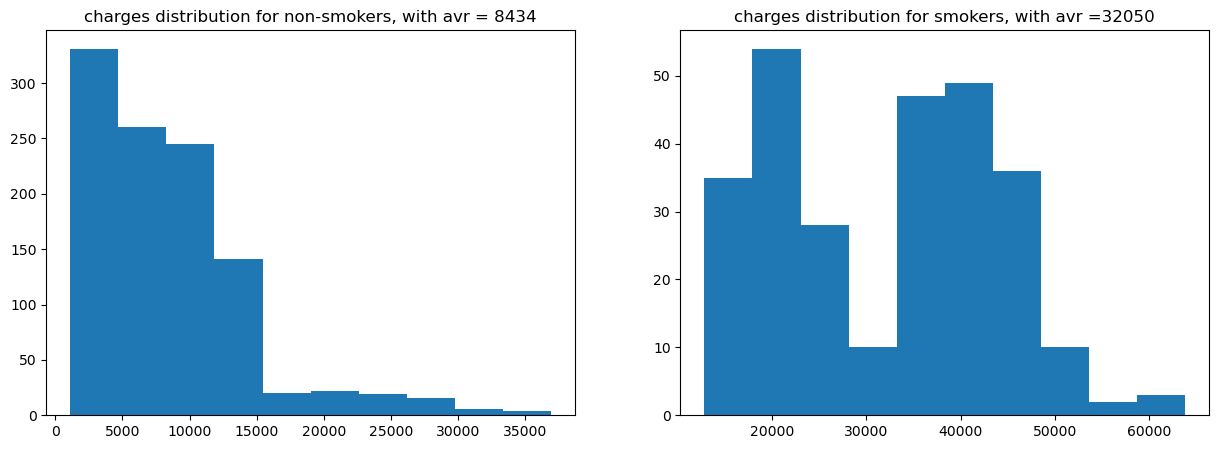

In [42]:
#Test Your Zaka
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.hist(non_smokers.charges)
non_smokers_char_av = non_smokers.charges.mean()
ax1.set_title('charges distribution for non-smokers, with avr = '+ str(int(non_smokers_char_av)))

ax2.hist(smokers.charges)
smokers_char_av = smokers.charges.mean()
ax2.set_title('charges distribution for smokers, with avr ='+ str(int(smokers_char_av)))

Who spends more on treatment? Smokers or non Smokers? 

**we can easily see how smokers are more likely to cause bigger costs with two peaks around 20,000 and 40,000 respectively, while the non-smokers are way less than that with only one peak around 2,800**

#### Correlation between age and cost of treatment

First, plot the distribution of age in our dataset

Text(0.5, 1.0, 'age distribution')

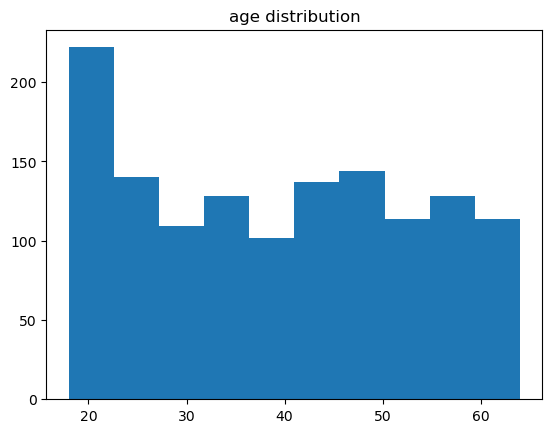

In [43]:
#Test Your Zaka
plt.hist(df.age)
plt.title('age distribution')

plot the correlation between age and cost of treatment

Text(0, 0.5, 'charges')

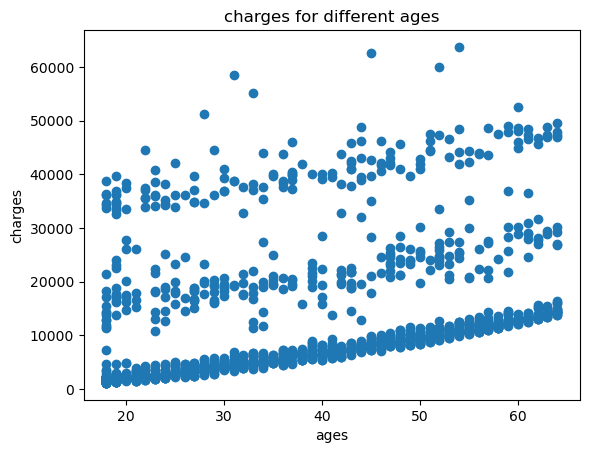

In [44]:
#Test Your Zaka
plt.scatter(df.age , df.charges)
plt.title('charges for different ages')
plt.xlabel('ages')
plt.ylabel('charges')

Let's check if smoking also affects this curve.

**Task**: show a scatter plot with the correlation between age and cost of treatment while showing smokers in red and non-smokers in blue

Text(0, 0.5, 'Charges')

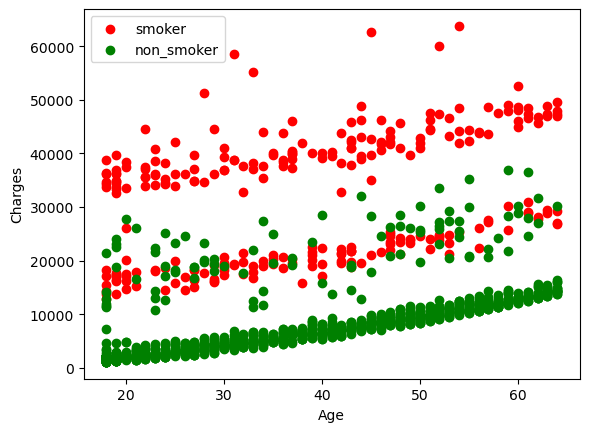

In [45]:
#Test Your Zaka
plt.scatter(smokers.age , smokers.charges, c = 'r', label = 'smoker' )
plt.scatter(non_smokers.age , non_smokers.charges, c = 'g', label = 'non_smoker' )
plt.legend()
plt.xlabel('Age')
plt.ylabel('Charges')

#### Correlation between BMI and cost of treatment

# Body Mass Index

![alt text](https://4.bp.blogspot.com/-nBF9Z1tFGhI/W3MqbdD0j7I/AAAAAAAAAIs/UdyXTIxsBT8Pl8usABxEK_Fusj5S0SnBQCLcBGAs/s1600/HOW%2BTO%2BCALCULATE%2BBODY%2BMASS%2BINDEX%2BBMI.jpg)

# BMI Chart

![BMI char](https://images.squarespace-cdn.com/content/v1/56fae4be1d07c0c393d8faa5/1551103826935-HCXS8U78500C06GQ1PLJ/ke17ZwdGBToddI8pDm48kNMeyc_nGAbaGjp3EBJ2o08UqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKckzCNDuUMr1wTvf7-fqd2hrX5O2-_PoO3UJ2jNU1VzJbe6G9-F0r9BTATNUu-NBMy/BMI+Chart.jpg)

First, plot the distribution of BMI in our dataset.

Text(0.5, 1.0, 'BMI distribution')

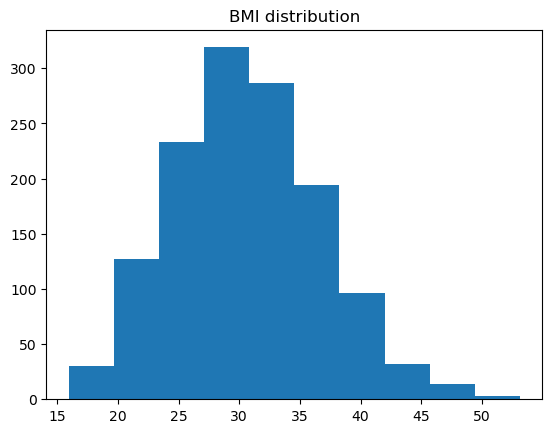

In [46]:
#Test Your Zaka
plt.hist(df.bmi)
plt.title('BMI distribution')

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.
Separate the dataset between 4 datasets: one for obese, one for overweight, one for healthy, and one for underweight, and then, give the number of examples that we have for each of those classes.

In [47]:
#Test Your Zaka
underweight = df[df.bmi < 18]
healthy = df[(df.bmi >= 18) & (df.bmi <= 24)]
overweight = df[(df.bmi >= 25) & (df.bmi <= 29)]
obese = df[df.bmi >= 30]

print('there are {} underweight , {} healthy , {} overweight and {} obese individuals in our dataset '.format(underweight.shape[0],healthy.shape[0],overweight.shape[0],obese.shape[0]) )

there are 15 underweight , 173 healthy , 314 overweight and 705 obese individuals in our dataset 


To compare, plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing `obese` data in red, `overweight` data in yellow and `healthy` data in green.

Text(0, 0.5, 'Frequency')

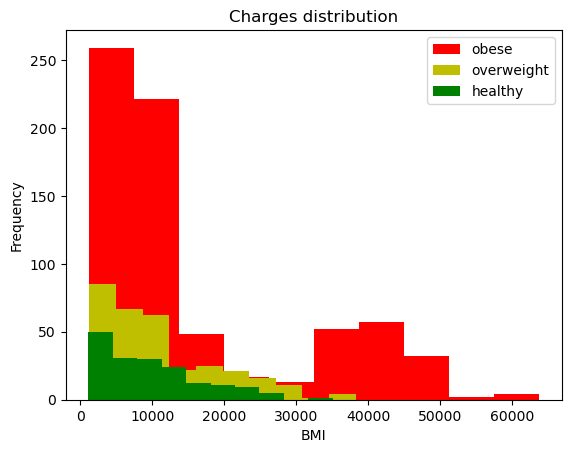

In [48]:
#Test Your Zaka
plt.hist(obese.charges , color='r', label= 'obese')
plt.hist(overweight.charges , color='y', label ='overweight')
plt.hist(healthy.charges , color= 'g', label='healthy')
plt.legend()
plt.title('Charges distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Patients with BMI above 30 spend more on treatment!

## 3. Data Preprocessing
"Garbage in, garbage out". 

Data should be preprocessed and cleaned to get rid of noisy data. 
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



Start by seeing how many missing data you have in each column

In [49]:
#Test Your Zaka
df.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

drop rows with missing values

In [50]:
#Test Your Zaka
df=df.dropna()

make sure you don't have any nulls using the info() function

In [51]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove unused columns

Let's remove the `region` column since we don't really care about it

In [52]:
#Test Your Zaka
df.drop('region',axis=1,inplace = True)

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [53]:
#Test Your Zaka
gender= {'male' : 0 , 'female' : 1}
df.sex = df.sex.apply(lambda x : gender[x])

And now the smokers column

In [55]:
#Test Your Zaka
smoking= {'no' : 0 , 'yes' : 1}
df.smoker = df.smoker.apply(lambda x : smoking[x])

#### Normalization

Let's scale all the columns by dividing by the maximum

First get the maximum of each column

In [56]:
#Test Your Zaka
df_max = df.max()
print(df_max)

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64


Divide each column by its maximum value

In [59]:
#Test Your Zaka
df = df.divide(df_max)

In [60]:
df.head()

,age,sex,bmi,children,smoker,charges
0,0.296875,1.0,0.525127,0.0,1.0,0.264777
1,0.281250,0.0,0.635611,0.2,0.0,0.027059
2,0.437500,0.0,0.621118,0.6,0.0,0.069773
3,0.515625,0.0,0.427348,0.0,0.0,0.344744
4,0.500000,0.0,0.543572,0.0,0.0,0.060637


## 4. MultiLinear Regression Model Training



#### Data splits

Before training, we need to split data into training (80%) & testing (20%) using a random_state of 42.
Print the shape of your training and testing data.

In [ ]:
# X = df.iloc[0:5,:].values
# print(X)

In [61]:
#Test Your Zaka
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 5) (1068,)
(267, 5) (267,)


### Optimization Using Gradient Descent

We remind you that this is a multi linear regression problem <br>
* The equation is y = **a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5 <br>
In other words, we have the following: <br>
* charges = **a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * smoker
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a


Implement the function Gradient_descent that has the following specifications. Beware of the naming of the variables

In [68]:
def Gradient_descent (x, y, learning_rate, nb_iterations, initial_a):
  
  #Test Your Zaka
  n= x.shape[0]
  a0 , a1 , a2 , a3 , a4 , a5 = initial_a
  X = [x[:,0] , x[:,1] , x[:,2] , x[:,3] , x[:,4]]
  costs=[]

  for i in range(nb_iterations) :
    y_pred = a0 + a1*X[0] + a2*X[1] + a3*X[2] + a4*X[3] + a5*X[4]
    costs.append(np.sum((y-y_pred)**2)/n)

    if((np.sum((y-y_pred)**2)/n) <0.01):  #so that we don't have to wait all nb_iterations when we'll have reached our goal (1% cost)
      break

    a0_der = (-2/n)*np.sum(y-y_pred)
    a1_der = (-2/n)*np.sum(X[0]*(y-y_pred))
    a2_der = (-2/n)*np.sum(X[1]*(y-y_pred))
    a3_der = (-2/n)*np.sum(X[2]*(y-y_pred))
    a4_der = (-2/n)*np.sum(X[3]*(y-y_pred))
    a5_der = (-2/n)*np.sum(X[4]*(y-y_pred))
  #
    a0= a0 - learning_rate*a0_der
    a1= a1 - learning_rate*a1_der
    a2= a2 - learning_rate*a2_der
    a3= a3 - learning_rate*a3_der
    a4= a4 - learning_rate*a4_der
    a5= a5 - learning_rate*a5_der

  return costs, np.array([a0, a1, a2, a3, a4, a5])

Now that we have the function ready, we can use it to obtain the optimum coefficient values, and use them for future predictions.

Initialize the number of iteration as 10000, and the learning rate as 0.1. Then write the model equation you obtained

In [69]:
#Test Your Zaka

costs , a = Gradient_descent(x_train,y_train,0.1,10000,initial_a=[1,2,3,4,5,6])
print(len(costs),'iterations done') #so we could know if it reaches the max nb_iterations OR NOT
print(a)
print('the model equation is : \nY = {} + {} X1 + {} X2 + {} X3 + {} X4 + {} X5'.format(*a))
# print(y_pred)

1177 iterations done
[-0.32480721  0.25989912  0.01206474  0.48606738  0.04826339  0.36914979]
the model equation is : 
Y = -0.3248072145160347 + 0.25989911733183957 X1 + 0.012064739969404431 X2 + 0.486067377791065 X3 + 0.04826339390593347 X4 + 0.36914978980057384 X5


Plot the cost function

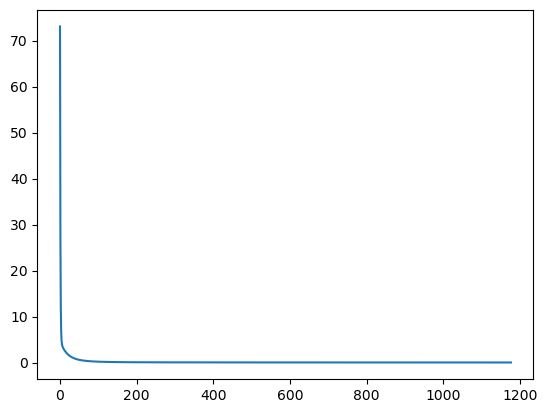

In [75]:
#Test Your Zaka
plt.plot(costs)

###Predicting Using Vectorized Gradient Descent

Of course you noted some redundancy in the Gradient Descent implementation, this is why we opt to use a vectorized notation that might be a bit more difficult, but the concept remains the same.
This representation will be useful especially when your number of features starts to increase!

In [83]:
def Gradient_descent_vectorized (x, y, learning_rate, nb_iterations, initial_a):

  #Test Your Zaka
   n= x.shape[0]
   a=initial_a
   X=x.T
   for i in range(nb_iterations) :
    y_pred = a[0] + np.dot(a[1:],X)

    if((np.sum((y-y_pred)**2)/n) <0.01):  #so that we don't have to wait all nb_iterations when we'll have reached our goal (1% cost)
      break
      
    a0_der=(-2/n)*np.sum(y-y_pred)
    a_der= np.insert((-2/n)*np.sum(X*(y-y_pred),axis=1),0,a0_der)
    a =  a - learning_rate*(a_der)
   return a 


Train your model using the vectorized notation with the same initializations that you did previously. Then write the equation you obtained for your model.

In [93]:

# Generating sample data
np.random.seed(42)
n = 5  # Number of data points
m = 3  # Number of features
X = np.random.rand(n, m)  # Features matrix
print('X :\n',X)

x = X.T
print(f'x : ({x.shape})\n',x)

y = np.random.rand(n)     # Target values
print(f'y : ({y.shape})\n',y)

y_pred = np.random.rand(n)  # Predicted values
print('y_pred :\n',y_pred)

# Calculating the derivative
derivative = (-2/n)*np.sum(x*(y-y_pred), axis=1)

print("Derivative array shape:", derivative.shape)
print("Derivative values:", derivative)


X :
 [[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]]
x : ((3, 5))
 [[0.37454012 0.59865848 0.05808361 0.70807258 0.83244264]
 [0.95071431 0.15601864 0.86617615 0.02058449 0.21233911]
 [0.73199394 0.15599452 0.60111501 0.96990985 0.18182497]]
y : ((5,))
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
y_pred :
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]
Derivative array shape: (3,)
Derivative values: [0.05564602 0.08551903 0.0457831 ]


In [84]:
#Test Your Zaka
a = Gradient_descent_vectorized(x_train,y_train,0.1,10000,initial_a=[1,2,3,4,5,6])
print('the model equation is : \nY = {} + {} X1 + {} X2 + {} X3 + {} X4 + {} X5'.format(*a))


the model equation is : 
Y = -0.32480721451603495 + 0.25989911733183957 X1 + 0.012064739969404447 X2 + 0.48606737779106535 X3 + 0.04826339390593346 X4 + 0.36914978980057384 X5
[1.31765588e-04 1.11934296e-04 4.68861839e-03 1.13250568e-04
 4.99521853e-05]


You should obtain the same result as above.

Write a function that you'll use to make predictions

In [97]:
df_max

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64

In [98]:
def predict_medical_charges (a, x):

  #Test Your Zaka
  charges =(a[0] + np.dot(a[1:],x.T))*df_max[-1]

  return charges

make a prediction of the medical charges on the first example we have in our training set

In [99]:
#Test Your Zaka
predict_medical_charges(a,df.iloc[0,:-1])

24794.707170082824

###Linear Regression Model Evaluation

Now we will evaluate our model with the metrics that we studied during the course. In order to do so, we will calculate the predicted values on the test set.

In [100]:
#Test Your Zaka

y_pred = predict_medical_charges(a,x_test)

Let's get the number of examples in the test set.

In [101]:
#Test Your Zaka
nb = len(y_pred)
nb

267

####Mean Absolute Error (MAE)

Calculate the MAE between the predicted and the real values

In [102]:
#Test Your Zaka
mae = np.sum(np.abs(y_test-y_pred))/nb
mae

14582.53644992589

####Mean Squared Error (MSE)

Calculate the MSE

In [103]:
#Test Your Zaka
mse = np.sum((y_test-y_pred)**2)/nb
mse

339631521.1701952

####Root Mean Squared Error (RMSE)

This is just the root of the MSE that we computed. This is another metric we can look at to evaluate our regression models.

In [104]:
#Test Your Zaka
rmse = np.sqrt(mse)
rmse 

18429.09442078463

### Prediction Using Scikit Learn Library


Now to validate the results that we got, we will use the scikit learn library to give us the values of the coefficients that we got using Gradient Descent.
for this purpose, you have to build a linear regression mode, and fit it on the training data

In [105]:
#Test Your Zaka
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

####Features importance (Coefficients)


Get the importance of each of your features, and compare the results with the ones you obtained in your gradient descent.

In [106]:
#Test Your Zaka
print(model.coef_)
print(a[1:])

[0.25340124 0.00636305 0.24684219 0.04254233 0.3666139 ]
[0.25989912 0.01206474 0.48606738 0.04826339 0.36914979]


You should obtain the same coefficient values in the 3 approaches that we considered. Our computed values from GD are the same as the values that we got from sickit learn, which means the implementation was correct.

####Evaluation using Scikit learn

Now we will compute the same metrics we computed earlier but using the sklearn library.

We start by calculating the predicted values for this model.

In [107]:
#Test Your Zaka
y_pred = model.predict(x_test)

Now we will evaluate the sklearn model using the sklearn library to get error metrics (MAE, MSE, RMSE)

In [108]:
#Test Your Zaka
from sklearn.metrics import mean_absolute_error as MAE ,mean_squared_error as MSE
print(MAE(y_test,y_pred))
print(MSE(y_test,y_pred))
print(np.sqrt(MSE(y_test,y_pred)))

0.0661370962155141
0.008402410307189205
0.09166466225972365


the values should be so close to the ones we got from the model you built yourself.

Calculate the R2 value using the model.score() function

In [109]:
#Test Your Zaka
r2 = model.score(x_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.8043792068989462




---
#Classification based on several features with Gradient Descent


Now, we will predict based on all the features that we have if the person is smoker or not a smoker, and we'll use GD as optimization tool.
We'll follow the same steps as above.

Split your data between training (80%) and testing (20%), and print the shapes of your training and testing data. Use random state of 42

In [110]:
#Test Your Zaka
Xc = df.drop('smoker',axis=1).values
Yc = df.smoker.values
Xc_train,Xc_test,Yc_train,Yc_test = train_test_split(Xc,Yc,test_size=0.2,random_state=42)
Xc_train.shape,Xc_test.shape,Yc_train.shape,Yc_test.shape


((1068, 5), (267, 5), (1068,), (267,))

##Optimization using Gradient Descent

Now we will implement Gradient Descent to do this classification between smoker and non-smoker.

###Sigmoid Function

start by implementing the sigmoid function

In [111]:
#Test Your Zaka
def sigmoid(v):
  return 1/(1+np.exp(-v))

Now, we start with Gradient Descent for classification.

We remind you that this is a classification based on several features <br>
* The equation is y = sigmoid(**a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5) <br>
In other words, we have the following: <br>
* smoker = sigmoid(**a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * charges)
* This represents the probability of a person being smoker given the features that we mentioned. 
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a

Build the Gradient_descent_Classification function. Pay attention to the parameters provided.

In [112]:
def Gradient_descent_classification (x, y, learning_rate, nb_iterations, initial_a):
  #Test your Zaka
  n= x.shape[0]
  a0 , a1 , a2 , a3 , a4 , a5 = initial_a
  X = [x[:,0] , x[:,1] , x[:,2] , x[:,3] , x[:,4]]
  costs=[]

  for i in range(nb_iterations) :
    y_pred = sigmoid(a0 + np.dot([a1,a2,a3,a4,a5],X))
   
    co = (-1/n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    costs.append(co)
     
    if(co <0.01):  #so that we don't have to wait all nb_iterations when we'll have reached our goal (1% cost)
      break

    a0_der = (-1/n)*np.sum(y-y_pred)
    a1_der = (-1/n)*np.sum(X[0]*(y-y_pred))
    a2_der = (-1/n)*np.sum(X[1]*(y-y_pred))
    a3_der = (-1/n)*np.sum(X[2]*(y-y_pred))
    a4_der = (-1/n)*np.sum(X[3]*(y-y_pred))
    a5_der = (-1/n)*np.sum(X[4]*(y-y_pred))
  #
    a0= a0 - learning_rate*a0_der
    a1= a1 - learning_rate*a1_der
    a2= a2 - learning_rate*a2_der
    a3= a3 - learning_rate*a3_der
    a4= a4 - learning_rate*a4_der
    a5= a5 - learning_rate*a5_der

  return costs, np.array([a0, a1, a2, a3, a4, a5])

In [113]:
# def Gradient_descent_classification (x, y, learning_rate, nb_iterations, initial_a):
  
#   #Test Your Zaka
#   n=x.shape[0]
#   a=initial_a
#   X=x.T
#   costs=[]

#   for i in range(nb_iterations):
#      y_pred = sigmoid(a[0] + np.dot(a[1:],X))
#      co = (-1/n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
#      costs.append(co)
     
#      if(co <0.01):  #so that we don't have to wait all nb_iterations when we'll have reached our goal (1% cost)
#       break
      
#      a0_der=(-1/n)*np.sum(y-y_pred)
#      a_der= np.insert((-1/n)*np.sum(X*(y-y_pred),axis=1),0,a0_der)
#      a =  a - learning_rate*(a_der)


#   return costs, np.array([a[0], a[1], a[2], a[3], a[4], a[5]])


Now, we will train our model. Set the number of iterations to 10000, the learning rate to 0.1, and print the equation of the model you obtained.

In [123]:
#Test Your Zaka
costs ,b = Gradient_descent_classification (Xc_train, Yc_train, 0.1, 10000, initial_a=np.array([1,2,3,4,5,6]))
# print(costs)
print(b)
print(len(costs))

[-1.45842823 -3.07907658 -0.24019604 -2.62498717 -0.45172451 13.69866278]
10000


Plot the cost function

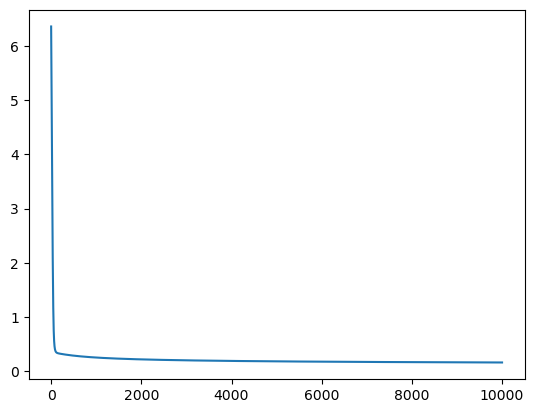

In [115]:
#Test Your Zaka
plt.plot(costs)

Now to predict we implement the following function that takes multiple examples in one numpy array x, and the parameters a, and gives back the prediction made for each example.
<br>**Reminder:** If the output of the sigmoid function is >0.5, we consider the output is 1, otherwise, we consider it 0

In [116]:
def predict_smoker(x, a):
  
  #Test Your Zaka
  rs=sigmoid(a[0] + np.dot(a[1:],x.T))
  result=[]
  for x in rs :
    if x>0.5:
      result.append(1)
    else:
      result.append(0)

  return result

Make predictions on your test data using the predict_smoker: Compute the predictions associated with your test set

In [117]:
#Test Your Zaka
predict_smoker(Xc_test,b)


[0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


##Classifier Evaluation

Now you will evaluate your classifier

###Accuracy Score

Compute the accuracy score of your classifier

In [118]:
#Test Your Zaka
y_real = Yc_test
y_pred = predict_smoker(Xc_test,b)
n = y_real.shape[0]

y_wrong = np.count_nonzero(y_real - y_pred, axis = 0)
y_correct = n - y_wrong

accuracy = float(y_correct)*100/n

print('the accuracy score of our classifier is',accuracy,'%')

the accuracy score of our classifier is 90.2621722846442 %


###Confusion Matrix

Compute the decision matrix for your classifier

In [119]:
#Test Your Zaka
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_real, y_pred)

print("Confusion Matrix :")
print(conf)

Confusion Matrix :
[[198   4]
 [ 22  43]]
